<a href="https://colab.research.google.com/github/basharbayatna/TimeSeries_Anaysis_CrimeData/blob/main/Time_Series_analysis_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [13]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import glob
import os

path = "/content/drive/MyDrive/AXSOSACADEMY/06-AdvancedML/Week21/Data/Data_Project3"
csv_files = glob.glob(os.path.join(path, "*.csv"))

dfs = {}   # dictionary for keyed DataFrames

for file in csv_files:
    filename = os.path.basename(file)   # e.g. "Chicago-Crime_2022.csv"

    # Extract year from the filename
    # Works for names like Chicago-Crime_2022.csv
    year = filename.split("_")[-1].replace(".csv", "")

    dfs[year] = pd.read_csv(file)




In [16]:
for f in csv_files:
    print(os.path.basename(f))

Chicago-Crime_2001.csv
Chicago-Crime_2002.csv
Chicago-Crime_2003.csv
Chicago-Crime_2004.csv
Chicago-Crime_2005.csv
Chicago-Crime_2006.csv
Chicago-Crime_2007.csv
Chicago-Crime_2008.csv
Chicago-Crime_2009.csv
Chicago-Crime_2010.csv
Chicago-Crime_2012.csv
Chicago-Crime_2011.csv
Chicago-Crime_2013.csv
Chicago-Crime_2014.csv
Chicago-Crime_2015.csv
Chicago-Crime_2016.csv
Chicago-Crime_2017.csv
Chicago-Crime_2018.csv
Chicago-Crime_2020.csv
Chicago-Crime_2019.csv
Chicago-Crime_2022.csv
Chicago-Crime_2021.csv


In [17]:
dfs['2022'].head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,12582293,01/01/2022 01:00:00 PM,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060
1,12607313,01/01/2022 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446
2,12585671,01/01/2022 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
3,12592889,01/01/2022 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
4,12584977,01/01/2022 01:00:00 AM,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560


# Q1: Comparing Police Districts
- Which district had the most crimes in 2022?

- Which had the least?

In [18]:
district_counts = dfs['2022']['District'].value_counts()
district_counts.sort_values(ascending=False)


,count
District,
8.0,14805
6.0,14694
12.0,14341
4.0,13931
11.0,13457
1.0,13044
18.0,12429
19.0,12243
25.0,11951


In [19]:
most_crimes_district = district_counts.idxmax()
most_crimes_count = district_counts.max()

In [20]:
least_crimes_district = district_counts.idxmin()
least_crimes_count = district_counts.min()

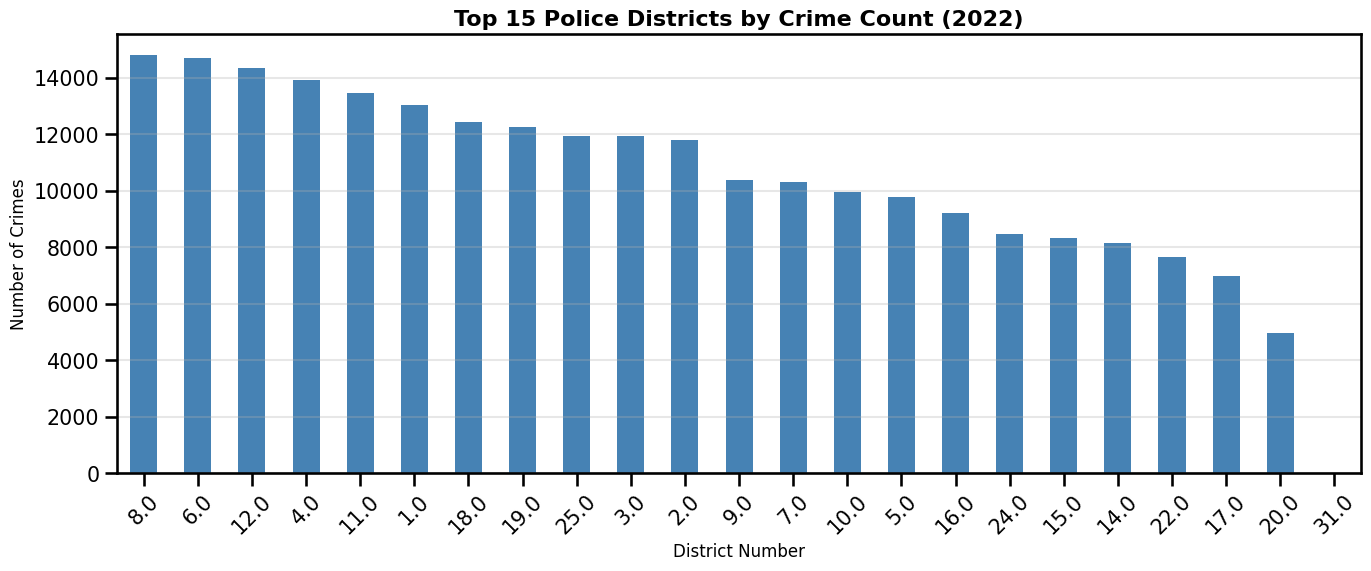

In [21]:
# Visualization
plt.figure(figsize=(14, 6))
district_counts.head(31).plot(kind='bar', color='steelblue')
plt.title('Top 15 Police Districts by Crime Count (2022)', fontsize=16, fontweight='bold')
plt.xlabel('District Number', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/district_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
print("Most crimes in 2022:")
print('District Number', most_crimes_district, "with", most_crimes_count, "crimes")

print("\nLeast crimes in 2022:")
print('District Number',least_crimes_district, "with", least_crimes_count, "crimes")

Most crimes in 2022:
District Number 8.0 with 14805 crimes

Least crimes in 2022:
District Number 31.0 with 15 crimes


# Q2: Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?

- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [23]:
# Total crimes per year
total_crimes_per_year = {year: len(df) for year, df in dfs.items()}

total_crimes_series = pd.Series(total_crimes_per_year).sort_index()

print("Total crimes per year:")
print(total_crimes_series)


Total crimes per year:
2001    485886
2002    486807
2003    475985
2004    469422
2005    453773
2006    448179
2007    437087
2008    427183
2009    392827
2010    370513
2011    351993
2012    336319
2013    307536
2014    275789
2015    264787
2016    269823
2017    269100
2018    268899
2019    261325
2020    212194
2021    208824
2022    238858
dtype: int64


In [24]:
# Overall yearly change
total_crimes_change = total_crimes_series.diff()  # difference between consecutive years
print(total_crimes_change)


2001        NaN
2002      921.0
2003   -10822.0
2004    -6563.0
2005   -15649.0
2006    -5594.0
2007   -11092.0
2008    -9904.0
2009   -34356.0
2010   -22314.0
2011   -18520.0
2012   -15674.0
2013   -28783.0
2014   -31747.0
2015   -11002.0
2016     5036.0
2017     -723.0
2018     -201.0
2019    -7574.0
2020   -49131.0
2021    -3370.0
2022    30034.0
dtype: float64


In [25]:
# Combine all years into one DataFrame with a "Year" column
all_years = pd.concat(
    [df.assign(Year=int(year)) for year, df in dfs.items()]
)

# Count crimes per type per year
crime_trends = all_years.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# Calculate yearly differences per crime type
crime_trends_diff = crime_trends.diff()


In [27]:
opposite_trends = {}

# Ensure indices match by converting to same type
crime_trends_diff.index = crime_trends_diff.index.astype(int)
total_crimes_change.index = total_crimes_change.index.astype(int)

# Get common years between both dataframes
common_years = crime_trends_diff.index.intersection(total_crimes_change.index)

for year in common_years:
    if pd.notna(total_crimes_change[year]) and pd.notna(crime_trends_diff.loc[year]).any():
        opposite = crime_trends_diff.columns[
            (crime_trends_diff.loc[year] * total_crimes_change[year] < 0)  # opposite sign
        ].tolist()

        if opposite:
            opposite_trends[year] = opposite

print("Crime types going opposite to overall trend each year:")
for year, crimes in opposite_trends.items():
    print(year, ":", crimes)

Crime types going opposite to overall trend each year:
2002 : ['BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER', 'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'SEX OFFENSE', 'STALKING', 'THEFT']
2003 : ['CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'GAMBLING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'NARCOTICS', 'NON-CRIMINAL', 'OFFENSE INVOLVING CHILDREN', 'STALKING', 'THEFT']
2004 : ['CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'GAMBLING', 'INTERFERENCE WITH PUBLIC OFFICER', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION', 'PROSTITUTION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'WEAPONS VIOLATION']
2005 : ['BURGLARY', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'INTERFERENCE WITH PUBL

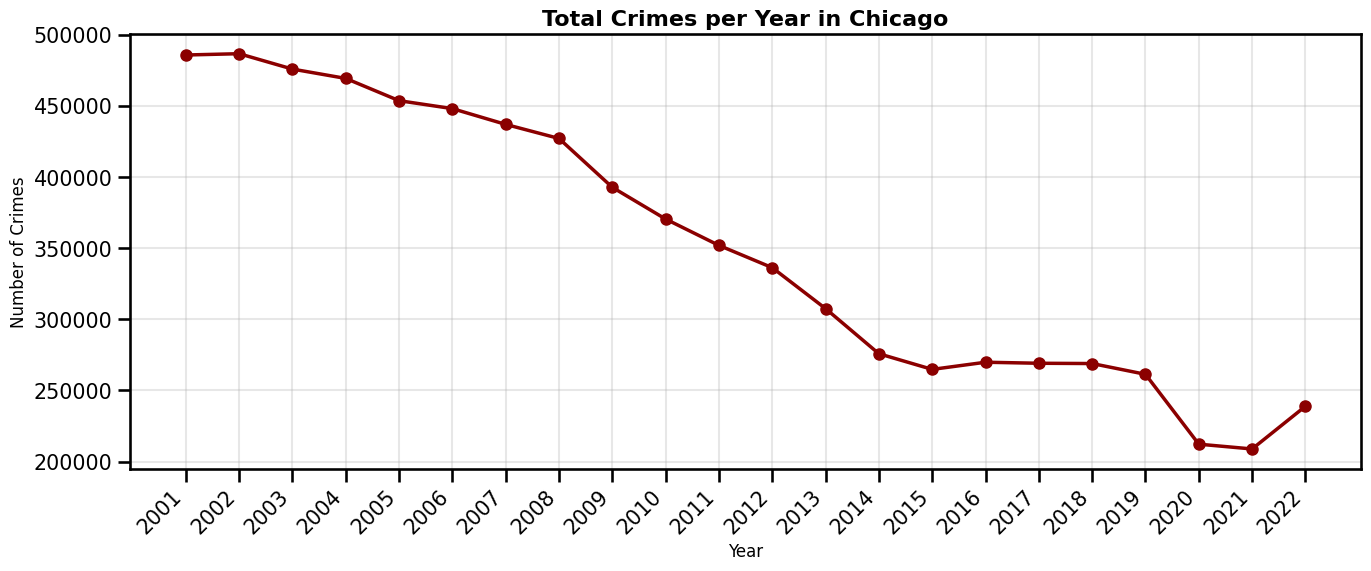

In [28]:
# Visualization
plt.figure(figsize=(14, 6))
plt.plot(total_crimes_series.index, total_crimes_series.values,
         marker='o', linewidth=2.5, markersize=8, color='darkred')
plt.title('Total Crimes per Year in Chicago', fontsize=16, fontweight='bold')
plt.ylabel('Number of Crimes', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(total_crimes_series.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/crimes_per_year.png', dpi=300, bbox_inches='tight')
plt.show()


# Q3:  Comparing AM vs. PM Rush Hour:

- Are crimes more common during AM rush hour or PM rush hour?

You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
You can consider any crime that occurred between 4 - 7 PM as PM rush hour.

- Answer the question: What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

- Answer the question: Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [29]:
# Combine all years into one DataFrame and keep a Year column
all_data = pd.concat([df.assign(Year=year) for year, df in dfs.items()])


In [30]:
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data['Hour'] = all_data['Date'].dt.hour


In [31]:
# AM rush: 7 AM - 10 AM
am_rush = all_data[(all_data['Hour'] >= 7) & (all_data['Hour'] < 10)]

# PM rush: 4 PM - 7 PM
pm_rush = all_data[(all_data['Hour'] >= 16) & (all_data['Hour'] < 19)]


In [32]:
total_am = am_rush.shape[0]
total_pm = pm_rush.shape[0]

print(f"Total crimes during AM rush hours: {total_am}")
print(f"Total crimes during PM rush hours: {total_pm}")

if total_am > total_pm:
    print("Crimes are more common during AM rush hour.")
else:
    print("Crimes are more common during PM rush hour.")


Total crimes during AM rush hours: 770651
Total crimes during PM rush hours: 1206353
Crimes are more common during PM rush hour.


In [33]:
top5_am = am_rush['Primary Type'].value_counts().head(5)
top5_pm = pm_rush['Primary Type'].value_counts().head(5)

print("\nTop 5 crimes during AM rush hour (all years):\n", top5_am)
print("\nTop 5 crimes during PM rush hour (all years):\n", top5_pm)



Top 5 crimes during AM rush hour (all years):
 Primary Type
THEFT              185239
BATTERY            108199
CRIMINAL DAMAGE     81281
BURGLARY            73999
OTHER OFFENSE       62453
Name: count, dtype: int64

Top 5 crimes during PM rush hour (all years):
 Primary Type
THEFT              293514
BATTERY            213002
CRIMINAL DAMAGE    134101
NARCOTICS          103032
ASSAULT             89600
Name: count, dtype: int64


In [34]:
am_mvt = am_rush[am_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
pm_mvt = pm_rush[pm_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]

print(f"\nMotor Vehicle Thefts during AM rush: {am_mvt}")
print(f"Motor Vehicle Thefts during PM rush: {pm_mvt}")

if am_mvt > pm_mvt:
    print("Motor Vehicle Thefts are more common during AM rush hour.")
else:
    print("Motor Vehicle Thefts are more common during PM rush hour.")



Motor Vehicle Thefts during AM rush: 41578
Motor Vehicle Thefts during PM rush: 53716
Motor Vehicle Thefts are more common during PM rush hour.


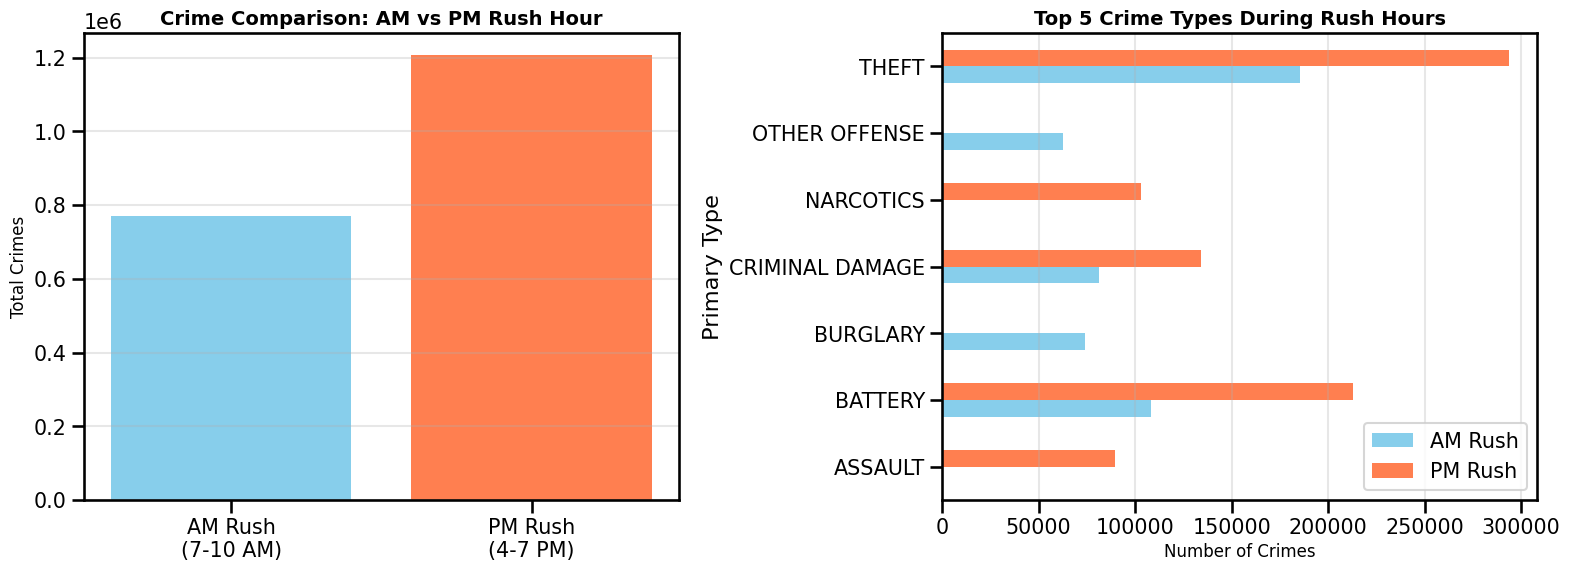


Top 5 AM rush hour crimes:
Primary Type
THEFT              185239
BATTERY            108199
CRIMINAL DAMAGE     81281
BURGLARY            73999
OTHER OFFENSE       62453
Name: count, dtype: int64

Top 5 PM rush hour crimes:
Primary Type
THEFT              293514
BATTERY            213002
CRIMINAL DAMAGE    134101
NARCOTICS          103032
ASSAULT             89600
Name: count, dtype: int64

Motor Vehicle Thefts - AM: 41578, PM: 53716


In [35]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar comparison
rush_comparison = pd.DataFrame({
    'Period': ['AM Rush\n(7-10 AM)', 'PM Rush\n(4-7 PM)'],
    'Crimes': [total_am, total_pm]
})
axes[0].bar(rush_comparison['Period'], rush_comparison['Crimes'],
            color=['skyblue', 'coral'])
axes[0].set_title('Crime Comparison: AM vs PM Rush Hour', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Crimes', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Top 5 crimes comparison
top5_am = am_rush['Primary Type'].value_counts().head(5)
top5_pm = pm_rush['Primary Type'].value_counts().head(5)

comparison_df = pd.DataFrame({
    'AM Rush': top5_am,
    'PM Rush': top5_pm
}).fillna(0)

comparison_df.plot(kind='barh', ax=axes[1], color=['skyblue', 'coral'])
axes[1].set_title('Top 5 Crime Types During Rush Hours', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Crimes', fontsize=12)
axes[1].legend(['AM Rush', 'PM Rush'])
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('images/rush_hour_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 AM rush hour crimes:")
print(top5_am)
print("\nTop 5 PM rush hour crimes:")
print(top5_pm)

am_mvt = am_rush[am_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
pm_mvt = pm_rush[pm_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
print(f"\nMotor Vehicle Thefts - AM: {am_mvt}, PM: {pm_mvt}")

# Q4: Comparing Months:

- Answer the question: What months have the most crime?

- What months have the least?

- Answer the question: Are there any individual crimes that do not follow this pattern?

- If so, which crimes

In [36]:
# Convert Date to datetime if not done already
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Extract month number (1 = January, 12 = December)
all_data['Month'] = all_data['Date'].dt.month


In [37]:
# Count total crimes per month
monthly_counts = all_data['Month'].value_counts().sort_index()

print("Total crimes per month:")
print(monthly_counts)


Total crimes per month:
Month
1     601236
2     529391
3     629704
4     627175
5     682932
6     681739
7     717232
8     710444
9     668242
10    676285
11    608961
12    579768
Name: count, dtype: int64


In [38]:
most_crime_month = monthly_counts.idxmax()
least_crime_month = monthly_counts.idxmin()

print(f"\nMonth with most crimes: {most_crime_month} ({monthly_counts.max()} crimes)")
print(f"Month with least crimes: {least_crime_month} ({monthly_counts.min()} crimes)")



Month with most crimes: 7 (717232 crimes)
Month with least crimes: 2 (529391 crimes)


In [39]:
# Group by Month and Primary Type
crime_by_month = all_data.groupby(['Month', 'Primary Type']).size().unstack(fill_value=0)

# Identify crimes that do NOT follow overall pattern
# Example: If overall most crime month is January but some crime peaks in another month
opposite_trends = {}

for crime in crime_by_month.columns:
    crime_month_max = crime_by_month[crime].idxmax()
    crime_month_min = crime_by_month[crime].idxmin()

    if crime_month_max != most_crime_month or crime_month_min != least_crime_month:
        opposite_trends[crime] = {
            'peak_month': crime_month_max,
            'lowest_month': crime_month_min
        }

print("\nCrimes that do NOT follow overall monthly trend:")
for crime, months in opposite_trends.items():
    print(f"{crime}: peak in month {months['peak_month']}, lowest in month {months['lowest_month']}")



Crimes that do NOT follow overall monthly trend:
ASSAULT: peak in month 5, lowest in month 2
BURGLARY: peak in month 8, lowest in month 2
CONCEALED CARRY LICENSE VIOLATION: peak in month 9, lowest in month 1
CRIM SEXUAL ASSAULT: peak in month 7, lowest in month 12
CRIMINAL TRESPASS: peak in month 3, lowest in month 12
DECEPTIVE PRACTICE: peak in month 1, lowest in month 2
DOMESTIC VIOLENCE: peak in month 1, lowest in month 2
GAMBLING: peak in month 8, lowest in month 12
HUMAN TRAFFICKING: peak in month 1, lowest in month 11
INTERFERENCE WITH PUBLIC OFFICER: peak in month 8, lowest in month 12
INTIMIDATION: peak in month 10, lowest in month 2
KIDNAPPING: peak in month 5, lowest in month 2
LIQUOR LAW VIOLATION: peak in month 6, lowest in month 12
MOTOR VEHICLE THEFT: peak in month 10, lowest in month 2
NARCOTICS: peak in month 3, lowest in month 12
NON - CRIMINAL: peak in month 6, lowest in month 3
NON-CRIMINAL: peak in month 10, lowest in month 1
NON-CRIMINAL (SUBJECT SPECIFIED): peak 

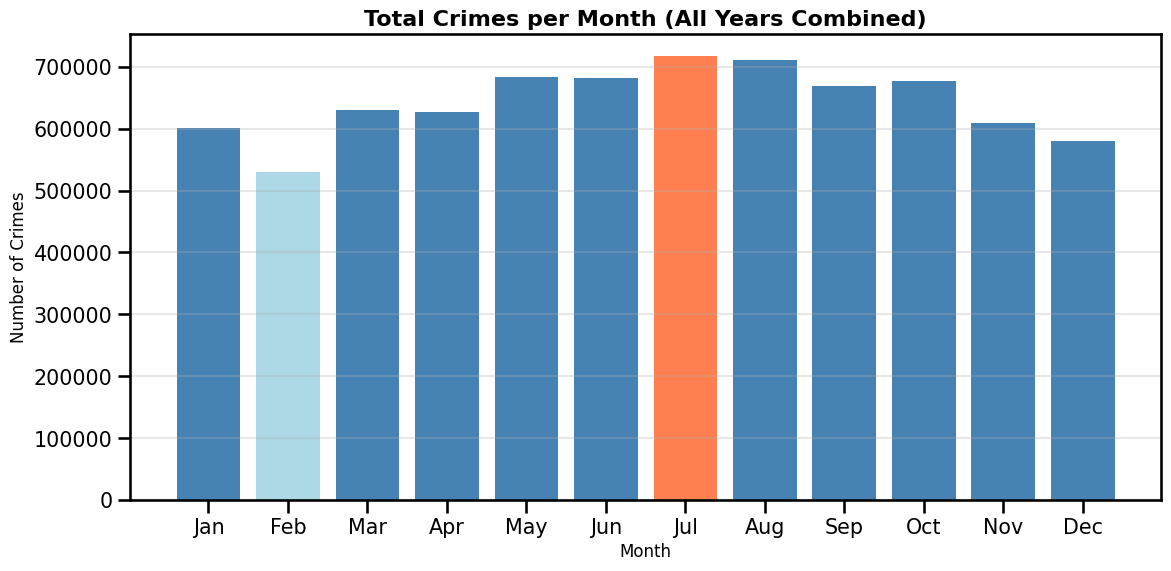

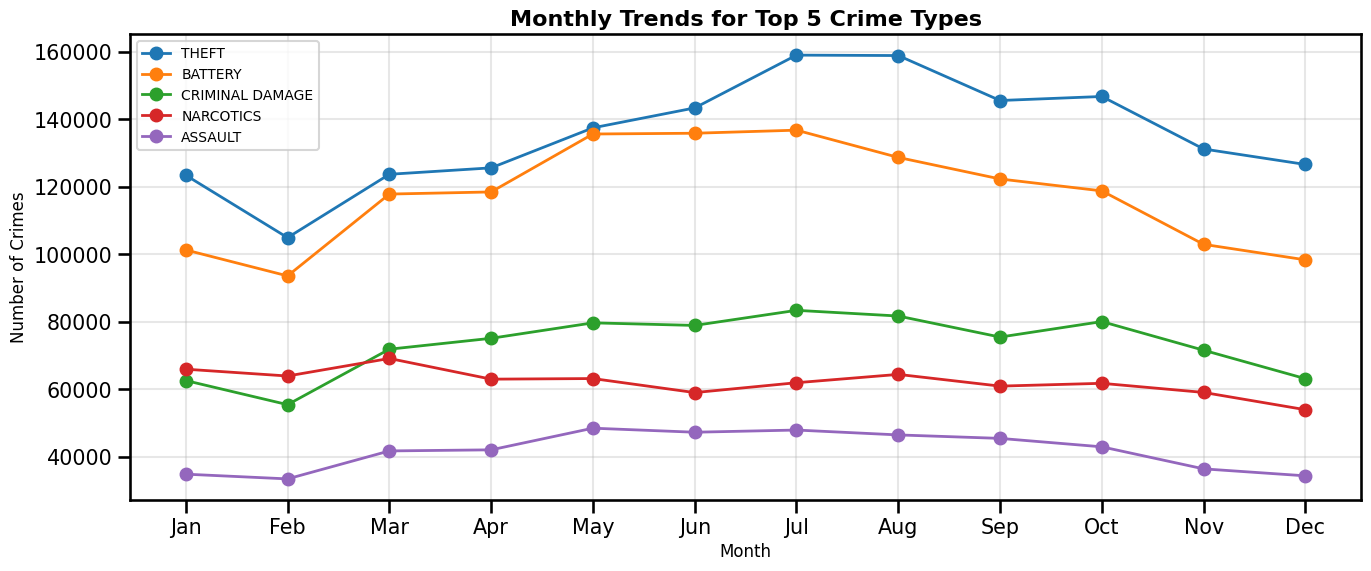

In [40]:
# Visualization 1: Overall monthly pattern
plt.figure(figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['coral' if i == most_crime_month-1 else 'lightblue'
          if i == least_crime_month-1 else 'steelblue' for i in range(12)]
plt.bar(range(1, 13), monthly_counts, color=colors)
plt.title('Total Crimes per Month (All Years Combined)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(1, 13), month_names)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/monthly_crimes.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: Top 5 crimes by month
crime_by_month = all_data.groupby(['Month', 'Primary Type']).size().unstack(fill_value=0)
top5_crimes = all_data['Primary Type'].value_counts().head(5).index

plt.figure(figsize=(14, 6))
for crime in top5_crimes:
    plt.plot(range(1, 13), crime_by_month[crime], marker='o', linewidth=2, label=crime)
plt.title('Monthly Trends for Top 5 Crime Types', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(1, 13), month_names)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/top5_crimes_monthly.png', dpi=300, bbox_inches='tight')
plt.show()

# Q5: Comparing Holidays:

- Answer the question: What are the top 3 holidays with the largest number of crimes?

- Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [41]:
!pip install holidays


In [42]:
import holidays

# Example: US holidays (you can change country='US' to your country if needed)
us_holidays = holidays.US(years=all_data['Date'].dt.year.unique())


In [43]:
# Create a Holiday column
all_data['Holiday'] = all_data['Date'].dt.date.map(lambda x: us_holidays.get(x))


In [44]:
holiday_crimes = all_data[all_data['Holiday'].notna()]


In [45]:
top3_holidays = holiday_crimes['Holiday'].value_counts().head(3)
print("Top 3 holidays with most crimes:")
print(top3_holidays)


Top 3 holidays with most crimes:
Holiday
New Year's Day      32725
Independence Day    22672
Labor Day           22164
Name: count, dtype: int64


In [46]:
for holiday in top3_holidays.index:
    print(f"\nTop 5 crimes on {holiday}:")
    top5_crimes = holiday_crimes[holiday_crimes['Holiday'] == holiday]['Primary Type'].value_counts().head(5)
    print(top5_crimes)



Top 5 crimes on New Year's Day:
Primary Type
THEFT                         6845
BATTERY                       6043
CRIMINAL DAMAGE               3236
DECEPTIVE PRACTICE            2934
OFFENSE INVOLVING CHILDREN    2380
Name: count, dtype: int64

Top 5 crimes on Independence Day:
Primary Type
BATTERY            5805
THEFT              4074
CRIMINAL DAMAGE    3309
ASSAULT            1547
NARCOTICS          1522
Name: count, dtype: int64

Top 5 crimes on Labor Day:
Primary Type
BATTERY            4607
THEFT              4520
CRIMINAL DAMAGE    2475
NARCOTICS          2078
ASSAULT            1525
Name: count, dtype: int64


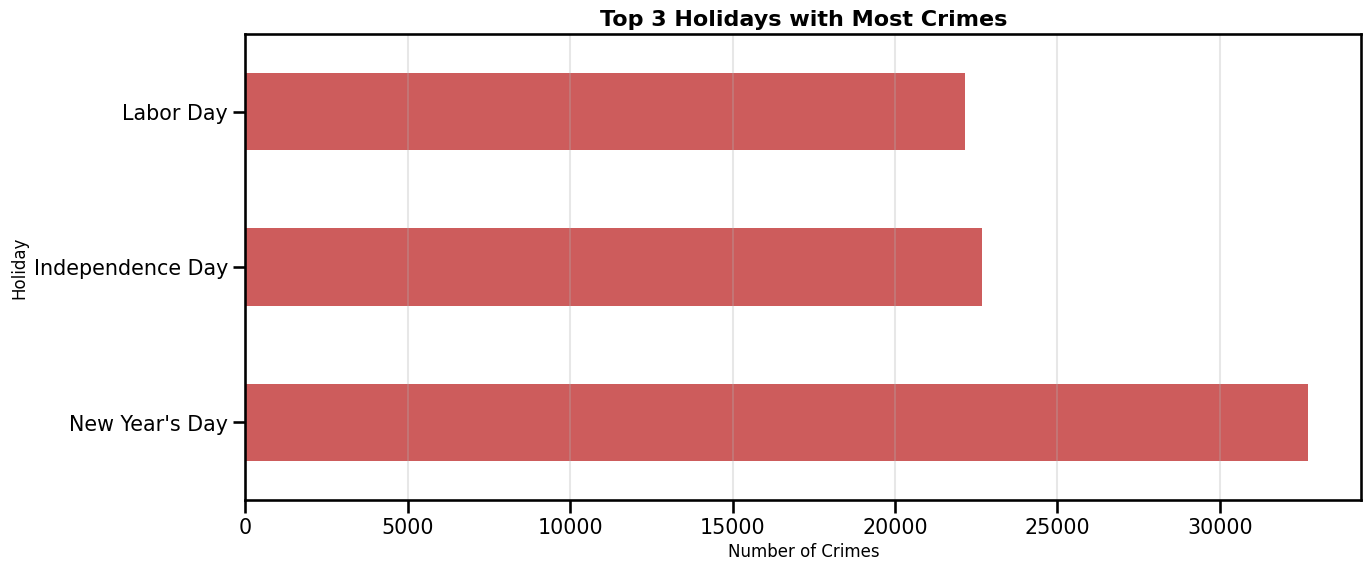

In [47]:
# Visualization
plt.figure(figsize=(14, 6))
top3_holidays.plot(kind='barh', color='indianred')
plt.title('Top 3 Holidays with Most Crimes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Crimes', fontsize=12)
plt.ylabel('Holiday', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('images/holiday_crimes.png', dpi=300, bbox_inches='tight')
plt.show()


# Q6:

In [48]:
import pandas as pd

# Ensure Date is datetime
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Set Date as index
all_data.set_index('Date', inplace=True)


In [49]:
# Total crimes per day
daily_crimes = all_data.resample('D').size()
daily_crimes.head()


,0
Date,
2001-01-01,1825
2001-01-02,1143
2001-01-03,1151
2001-01-04,1166
2001-01-05,1267


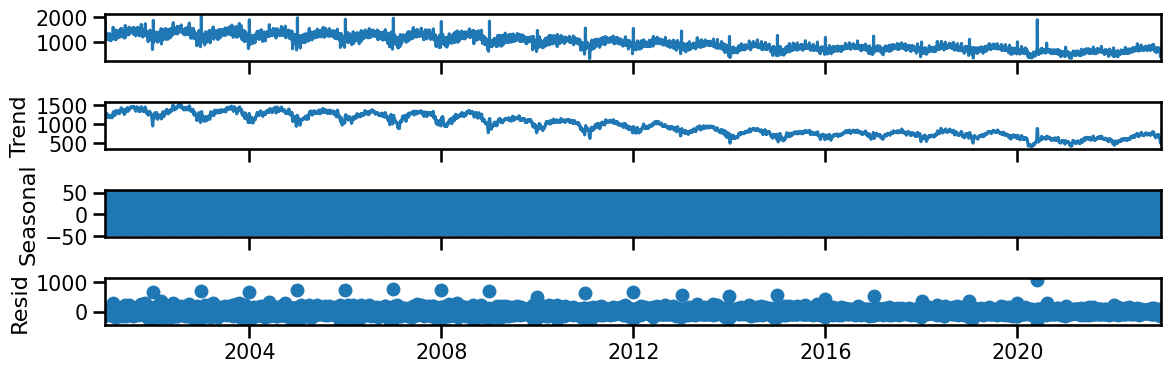

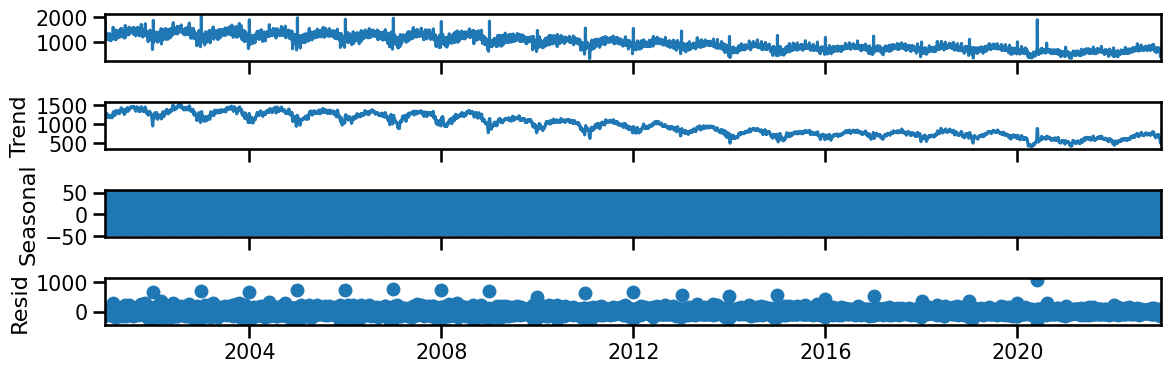

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose daily crimes
decomposition = seasonal_decompose(daily_crimes, model='additive')

# Plot decomposition
decomposition.plot()


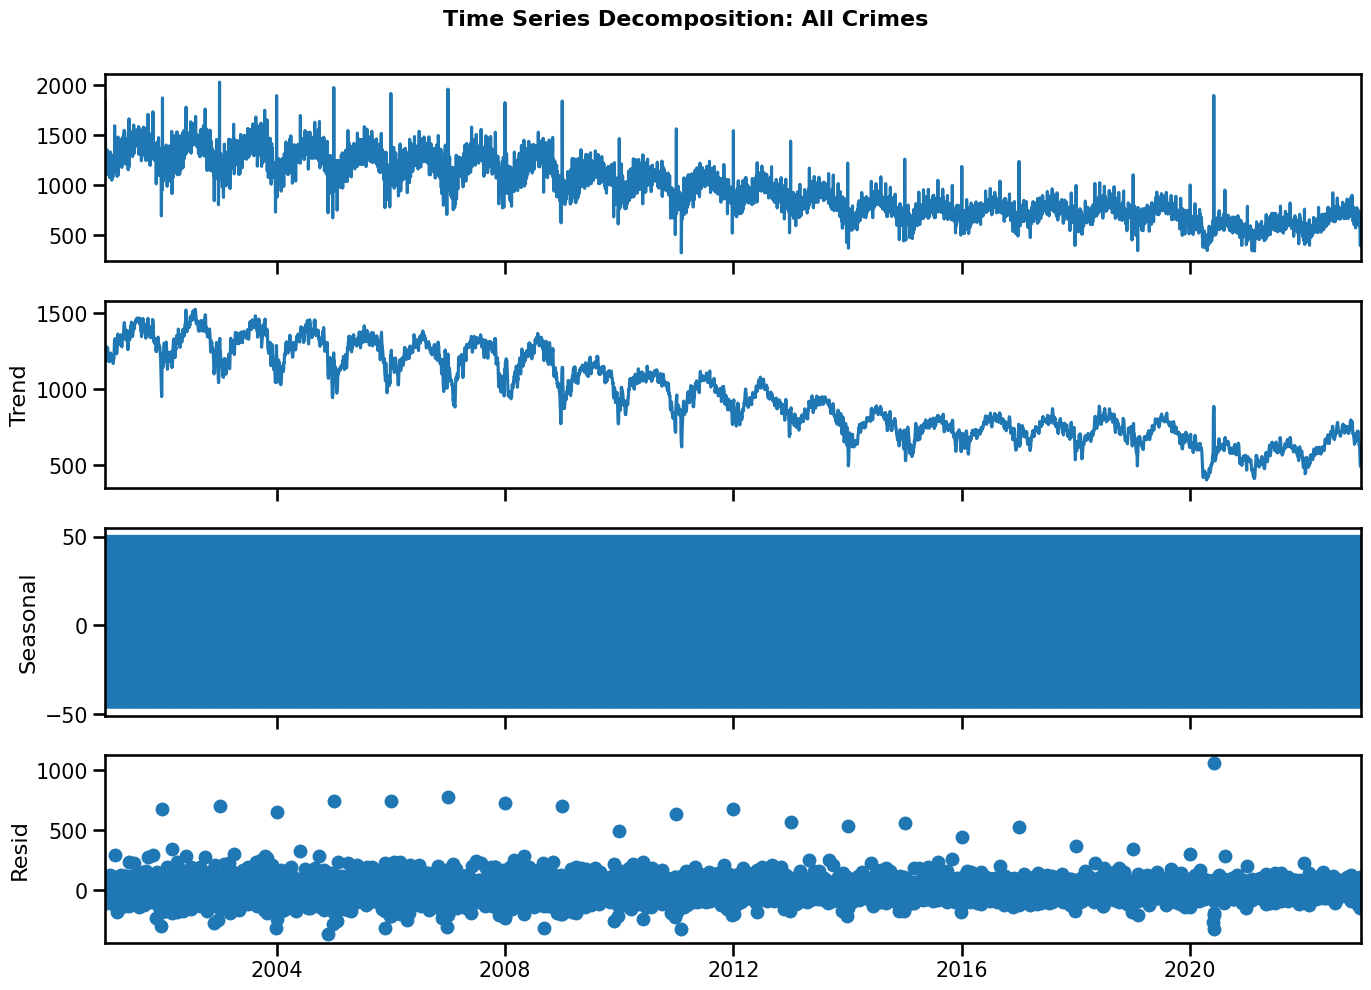

In [51]:
fig = decomposition.plot()
fig.set_size_inches(14, 10)
fig.suptitle('Time Series Decomposition: All Crimes', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('images/time_series_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
seasonal = decomposition.seasonal
cycle_magnitude = seasonal.max() - seasonal.min()
print(f"Cycle magnitude (max - min): {cycle_magnitude}")


Cycle magnitude (max - min): 96.2378876572425


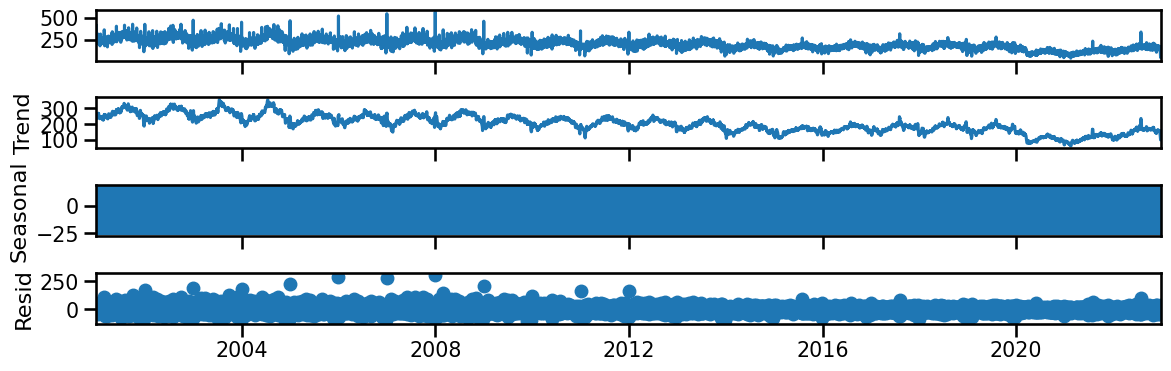

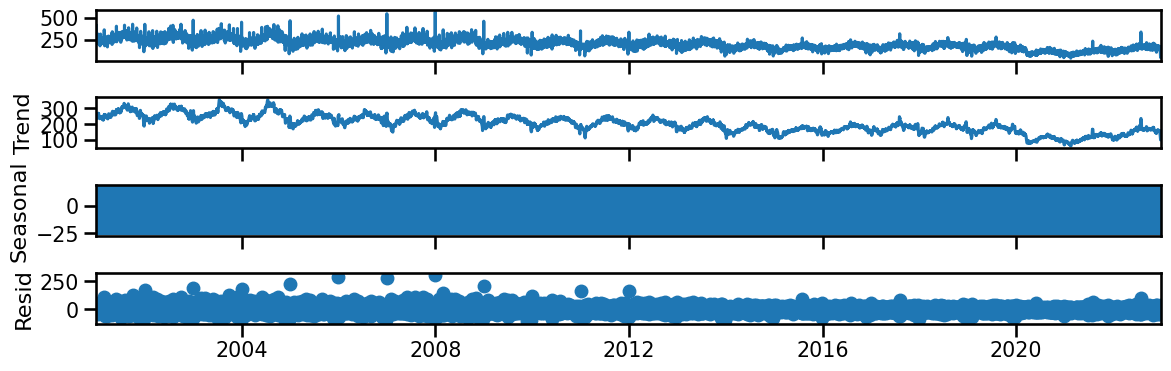

In [53]:
theft_daily = all_data[all_data['Primary Type'] == 'THEFT'].resample('D').size()
decomposition_theft = seasonal_decompose(theft_daily, model='additive')
decomposition_theft.plot()


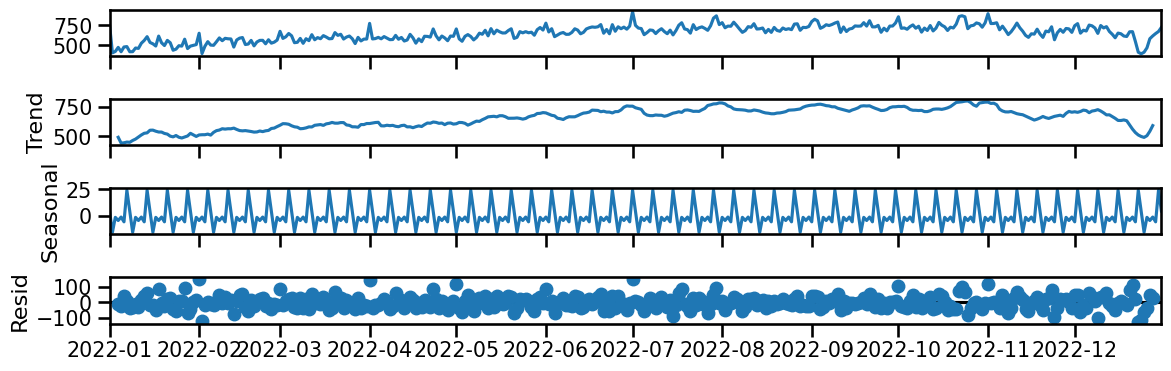

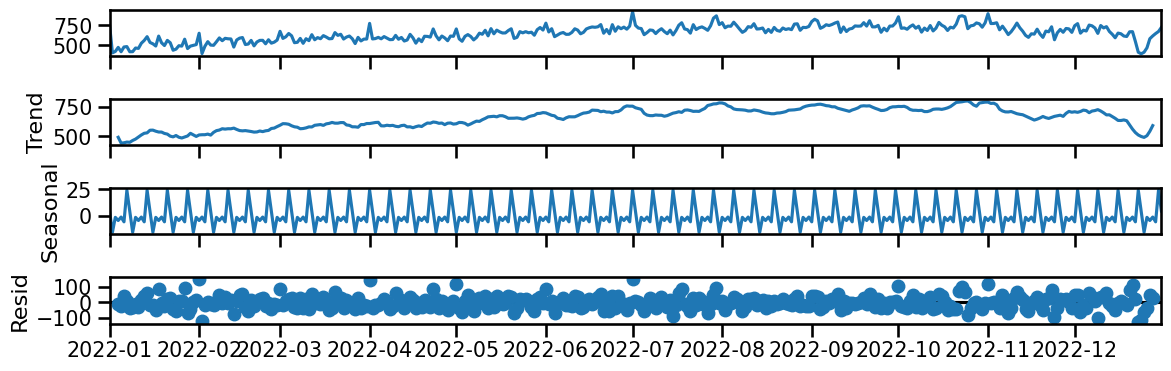

In [54]:
daily_crimes_2022 = daily_crimes['2022']
decomposition_2022 = seasonal_decompose(daily_crimes_2022, model='additive')
decomposition_2022.plot()


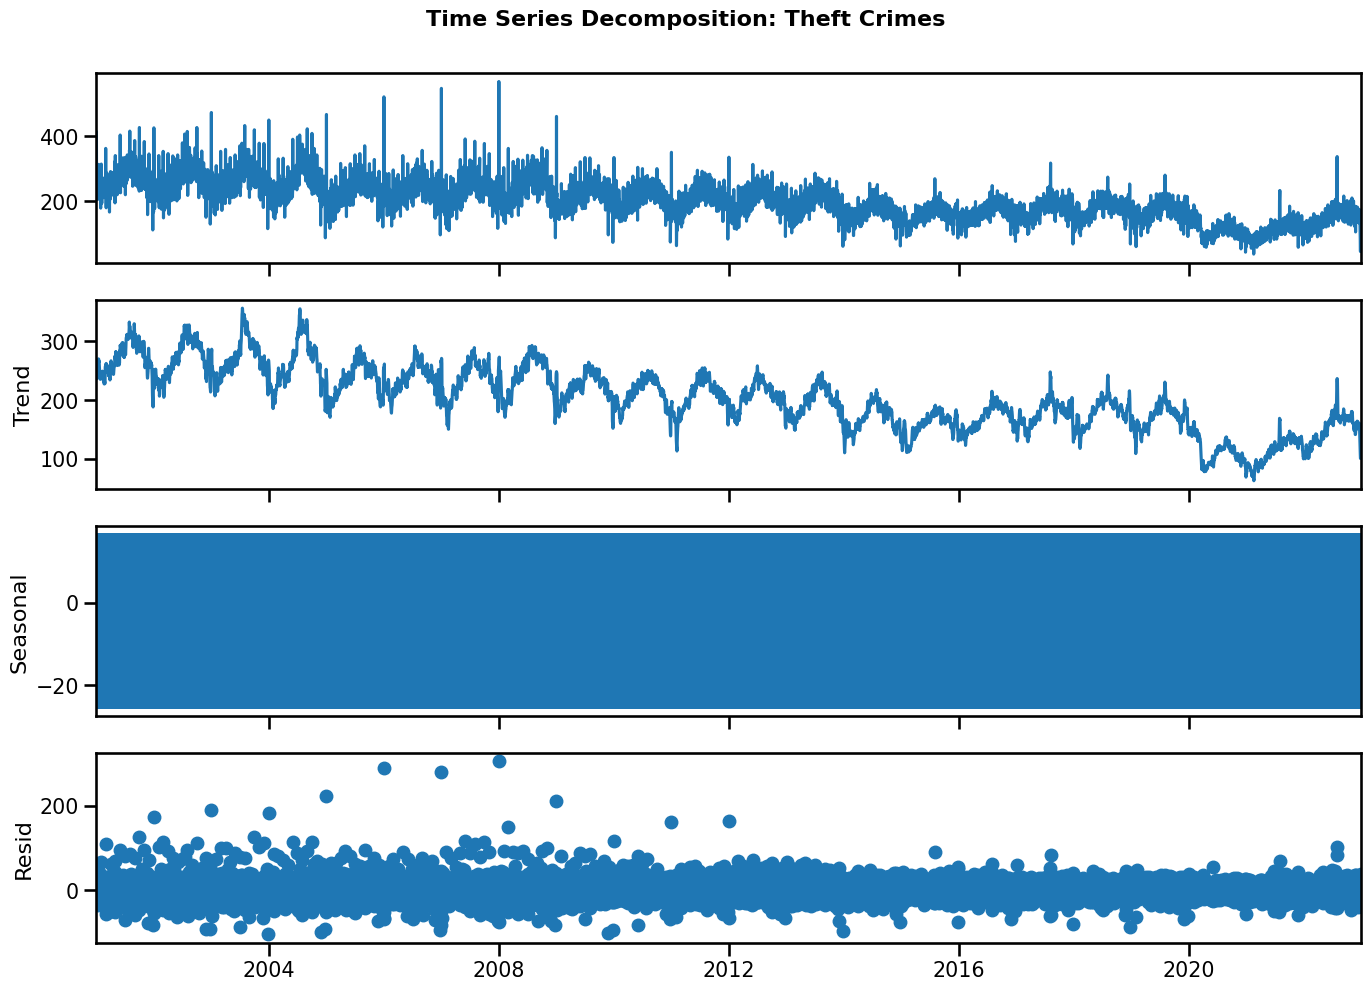

In [55]:
fig = decomposition_theft.plot()
fig.set_size_inches(14, 10)
fig.suptitle('Time Series Decomposition: Theft Crimes', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('images/theft_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()